# Решене уравнения

In [1]:
import random

import numpy as np
import sympy as sp
import scipy
import matplotlib.pyplot as plt

Дано уравнение:
$$
F(h, R, a, c, g) = R \cdot ln(\sqrt{4h^2+a^2}) - ln(a) - \frac{c}{\sqrt{4h^2+a^2}} - \frac{2hR}{\sqrt{4h^2+a^2}} + \frac{4h^2g}{3a} + 1=0
$$

Задан также интервал $[h_{min} \ldots h_{max}]$, на котором нужно найти численное решение.

In [2]:
def F(h, R, a, c, g):
    subF = sp.sqrt(4 * h**2 + a**2)
    return R * sp.log(subF) - sp.log(a) - (c + 2 * h * R) / subF + 4 * h**2 * g / 3 * a + 1


# 1
h, R, a, c, g = sp.symbols("h R a c g")
h_num = random.random() * 10
R_num = random.random() * 10
a_num = random.random() * 10
c_num = random.random() * 10
g_num = random.random() * 10

symbols = {
    h: h_num,
    R: R_num,
    a: a_num,
    c: c_num,
    g: g_num
}

func = F(h, R, a, c, g)
print("Function:", func)
print("Test values:", func.subs(symbols))
print()

# 2
func_simple = sp.simplify(func)
print("Simple function:", func_simple)
print("Test values:", func_simple.subs(symbols))
print()

# 3
my_symbols = {
    R: R_num,
    a: a_num,
    c: c_num,
    g: g_num
}

my_func = func_simple.subs(my_symbols)
my_func = sp.simplify(my_func)
print("Numeric function:", my_func)
print()

# 4
my_F_num = sp.lambdify(h, my_func, modules=['numpy'])

# 5
h_min = 0.0
h_max = 10.0

try:
    root = scipy.optimize.brentq(my_F_num, h_min, h_max)
    err = my_F_num(root)
    print("h-root:", root)
    print("Error:", err, f"{err:.6f}")
except ValueError:
    print("Root didn't found")

Function: R*log(sqrt(a**2 + 4*h**2)) + 4*a*g*h**2/3 - log(a) + 1 - (2*R*h + c)/sqrt(a**2 + 4*h**2)
Test values: 2078.87842879768

Simple function: -2*R*h/sqrt(a**2 + 4*h**2) + R*log(a**2 + 4*h**2)/2 + 4*a*g*h**2/3 - c/sqrt(a**2 + 4*h**2) - log(a) + 1
Test values: 2078.87842879768

Numeric function: (-19.9244168545753*h + sqrt(4*h**2 + 61.6273847784698)*(96.9634972382898*h**2 + 4.98110421364382*log(4*h**2 + 61.6273847784698) - 1.06055316492242) - 6.84917419626845)/sqrt(4*h**2 + 61.6273847784698)

Root didn't found


#### Основные этапы:

##### 1:
Создаём символы из sympy и случайные численные значения символов.
##### 2:
Упрощаем основное выражение если возможно и проверяем правильность за счёт подстановки данных.
##### 3:
Задаём реальные значения для вычисления (конкретно здесь чисто рандом) и упрощаем уже численно.
##### 4:
Создаём лямбда-функцию относительно h.
##### 5:
Вычисляем корень относительно заданного интервала для h.

#### Кратко про brentq от GPT:

•   Метод заключения в интервал: brentq является методом заключения в интервал. Это означает, что для его работы необходимо предоставить начальный интервал [a, b], на котором функция меняет знак. Другими словами, f(a) и f(b) должны иметь разные знаки (один положительный, другой отрицательный). Это гарантирует, что между a и b существует хотя бы один корень.

•   Комбинация методов: brentq является комбинацией нескольких методов:
    *   Метод бисекции (половинного деления): Этот метод гарантирует сходимость, но сходится относительно медленно. Метод бисекции делит интервал пополам и выбирает ту половину, на которой функция меняет знак.
    *   Метод секущих: Этот метод обычно сходится быстрее, чем метод бисекции, но не гарантирует сходимость. Метод секущих использует линейную интерполяцию для аппроксимации корня.
    *   Обратная квадратичная интерполяция: Этот метод также может сходиться быстрее, чем метод бисекции, но также не гарантирует сходимость.

    brentq использует метод бисекции в качестве запасного варианта, чтобы гарантировать сходимость, и пытается использовать более быстрые методы (метод секущих и обратную квадратичную интерполяцию) для ускорения сходимости.

•   Гарантированная сходимость: Если функция непрерывна на интервале [a, b] и f(a) и f(b) имеют разные знаки, то метод brentq гарантированно найдет корень на этом интервале (или приблизится к нему с заданной точностью).

•   Эффективность: brentq обычно сходится очень быстро, особенно по сравнению с методом бисекции.

Как работает scipy.optimize.brentq:

1.  Проверка начального интервала: Функция проверяет, что f(a) и f(b) имеют разные знаки. Если это не так, возникает ошибка ValueError, поскольку метод не может гарантировать наличие корня на этом интервале.

2.  Итеративный процесс: Функция выполняет итерации, на каждой из которых она пытается улучшить приближение к корню. На каждой итерации функция:
    *   Проверяет, можно ли использовать метод секущих или обратную квадратичную интерполяцию. Если эти методы дают разумное приближение к корню, они используются.
    *   Если метод секущих или обратная квадратичная интерполяция не дают разумного приближения, используется метод бисекции.
    *   Интервал [a, b] обновляется на основе полученного приближения к корню.

3.  Условия остановки: Итерации продолжаются до тех пор, пока не будет выполнено одно из следующих условий:
    *   Достигнута заданная точность (определяется параметрами xtol и rtol).
    *   Достигнуто максимальное количество итераций (определяется параметром maxiter).

Преимущества brentq:

•   Надежность: Гарантированная сходимость при соблюдении условий.
•   Эффективность: Обычно сходится быстро.
•   Широкая доступность: Реализован в SciPy, популярной библиотеке для научных вычислений на Python.

Недостатки brentq:

•   Требуется начальный интервал, на котором функция меняет знак.
•   Не находит комплексные корни.
•   Не может найти корни кратной четности (например, корень x=0 для функции f(x) = x^2), так как функция не меняет знак вблизи этих корней.


Ниже предоставлен пример кода для запуска с конкретными значениями на основе упрощённой функции из пункта 2:
$$
F(h, R, a, c, g) = -\frac{2Rh}{\sqrt{a^2 + 4h^2}} + R \cdot \frac{ln(a^2 + 4h^2)}{2} + \frac{4agh^2}{3} - \frac{c}{\sqrt{a^2 + 4h^2}} - ln(a) + 1
$$

In [3]:
def sF(h, R, a, c, g):
    return -2 * R * h / sp.sqrt(a**2 + 4 * h**2) + R * sp.log(a**2 + 4 * h**2) / 2 + 4 * a * g * h**2 / 3 - c / sp.sqrt(a**2 + 4 * h**2) - sp.log(a) + 1


def main(H: tuple[int, int], R, a, c, g):
    h = sp.symbols("h")

    func = sF(h, R, a, c, g)

    func = sp.simplify(func)
    F_num = sp.lambdify(h, func, modules=['numpy'])

    h_min, h_max = H

    X = np.linspace(h_min, h_max, 1000)
    Y = F_num(X)

    root = None
    try:
        root = scipy.optimize.brentq(F_num, h_min, h_max)
        err = F_num(root)
        print("h-root:", root)
        print("Error:", err, f"{err:.6f}")
    except ValueError:
        print("Root didn't found")

    plt.plot(X, Y, label=f"F(h, {R:.3f}, {a:.3f}, {c:.3f}, {g:.3f})")
    plt.axhline(y=0.0, color="r", linestyle="--", label="zero line")
    if root is not None:
        plt.axvline(x=root, color="g", label=f"root: h={root:0.6f}")
    plt.legend()

Пример запуска:

h-root: 0.157995756206782
Error: -1.551217520370498e-16 -0.000000


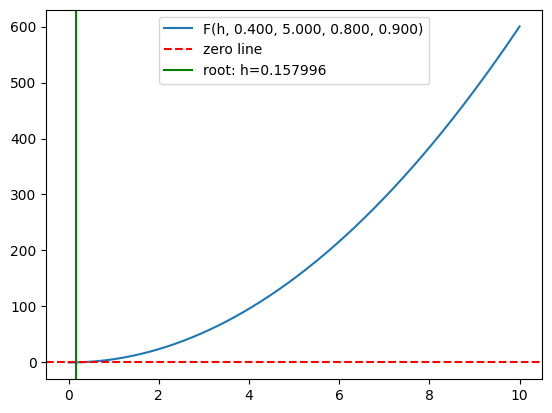

In [4]:
main((0.0, 10.0), 0.4, 5, 0.8, 0.9)

In [6]:
h, R, a, c, g = sp.symbols("h R a c g")

func = F(h, R, a, c, g)

subF = sp.sqrt(4 * h**2 + a**2)

s = sp.symbols("s")

func_s = func.subs(subF, s)

print(sp.solve(func_s, s))

[exp((3*R*LambertW((2*R*h + c)*exp((4*a*g*h**2 - 3*log(a) + 3)/R)**(1/3)/R) - 4*a*g*h**2 + 3*log(a) - 3)/(3*R)), exp((3*R*LambertW(-(1 - sqrt(3)*I)*(2*R*h + c)*exp((4*a*g*h**2 - 3*log(a) + 3)/R)**(1/3)/(2*R)) - 4*a*g*h**2 + 3*log(a) - 3)/(3*R)), exp((3*R*LambertW(-(1 + sqrt(3)*I)*(2*R*h + c)*exp((4*a*g*h**2 - 3*log(a) + 3)/R)**(1/3)/(2*R)) - 4*a*g*h**2 + 3*log(a) - 3)/(3*R))]
